In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Load and preprocess the dataset
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data = data.dropna()
data['High_Sales'] = data['Global_Sales'].apply(lambda x: 1 if x > 1 else 0)

In [28]:
# Select features and target
X = data[['Critic_Score', 'User_Score']]
y = data['High_Sales']

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[1088   10]
 [ 236   31]]
Accuracy: 0.82


In [19]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[1088   10]
 [ 236   31]]
Accuracy: 0.82


In [36]:
# Calculate MAD for each prediction
mad_values = abs(y_test - y_pred)

In [37]:
# Group the MAD values into larger segments and calculate MAD for each segment
segment_size = 50  # Adjust this value to change the number of points on the chart
num_segments = len(mad_values) // segment_size
mad_segments = [mad_values[i*segment_size:(i+1)*segment_size].mean() for i in range(num_segments)]


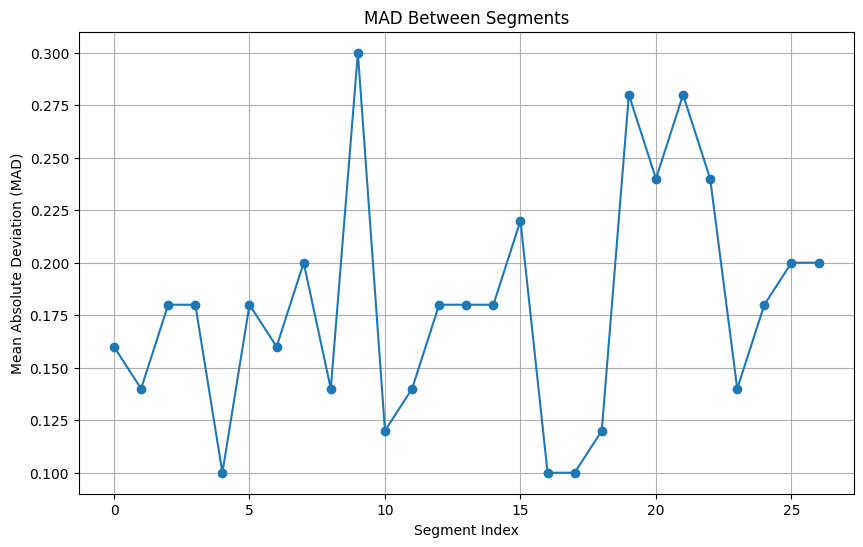

In [38]:
# Create a line chart for MAD segments
plt.figure(figsize=(10, 6))
plt.plot(range(len(mad_segments)), mad_segments, marker='o', linestyle='-')
plt.xlabel('Segment Index')
plt.ylabel('Mean Absolute Deviation (MAD)')
plt.title('MAD Between Segments')
plt.grid(True)
plt.savefig('mad_line_chart_between_segments.png')
plt.show()

In [39]:
# Calculate and print overall MAD
mad = mean_absolute_error(y_test, y_pred)
print(f"Overall Mean Absolute Deviation (MAD): {mad:.2f}")

Overall Mean Absolute Deviation (MAD): 0.18
